# Fine-tuning Florence-2 on DocVQA

In this notebook, we fine-tune Florence-2 by MSFT, a new vision language model capable of various tasks, on document question answering.


In [ ]:
!pip install -q datasets flash_attn timm einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

data = load_dataset("HuggingFaceM4/DocumentVQA")

README.md:   0%|          | 0.00/806 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/38 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/38 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

train-00000-of-00038.parquet:   0%|          | 0.00/61.0M [00:00<?, ?B/s]

train-00001-of-00038.parquet:   0%|          | 0.00/275M [00:00<?, ?B/s]

train-00002-of-00038.parquet:   0%|          | 0.00/220M [00:00<?, ?B/s]

train-00003-of-00038.parquet:   0%|          | 0.00/83.2M [00:00<?, ?B/s]

train-00004-of-00038.parquet:   0%|          | 0.00/20.4M [00:00<?, ?B/s]

train-00005-of-00038.parquet:   0%|          | 0.00/24.0M [00:00<?, ?B/s]

train-00006-of-00038.parquet:   0%|          | 0.00/26.2M [00:00<?, ?B/s]

train-00007-of-00038.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

train-00008-of-00038.parquet:   0%|          | 0.00/33.3M [00:00<?, ?B/s]

train-00009-of-00038.parquet:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

train-00010-of-00038.parquet:   0%|          | 0.00/25.1M [00:00<?, ?B/s]

train-00011-of-00038.parquet:   0%|          | 0.00/188M [00:00<?, ?B/s]

train-00012-of-00038.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

train-00013-of-00038.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

train-00014-of-00038.parquet:   0%|          | 0.00/126M [00:00<?, ?B/s]

train-00015-of-00038.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

train-00016-of-00038.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

train-00017-of-00038.parquet:   0%|          | 0.00/306M [00:00<?, ?B/s]

train-00018-of-00038.parquet:   0%|          | 0.00/355M [00:00<?, ?B/s]

train-00019-of-00038.parquet:   0%|          | 0.00/321M [00:00<?, ?B/s]

train-00020-of-00038.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

train-00021-of-00038.parquet:   0%|          | 0.00/276M [00:00<?, ?B/s]

train-00022-of-00038.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

train-00023-of-00038.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

train-00024-of-00038.parquet:   0%|          | 0.00/346M [00:00<?, ?B/s]

train-00025-of-00038.parquet:   0%|          | 0.00/321M [00:00<?, ?B/s]

train-00026-of-00038.parquet:   0%|          | 0.00/89.4M [00:00<?, ?B/s]

train-00027-of-00038.parquet:   0%|          | 0.00/51.1M [00:00<?, ?B/s]

train-00028-of-00038.parquet:   0%|          | 0.00/103M [00:00<?, ?B/s]

train-00029-of-00038.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00030-of-00038.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

train-00031-of-00038.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00032-of-00038.parquet:   0%|          | 0.00/130M [00:00<?, ?B/s]

train-00033-of-00038.parquet:   0%|          | 0.00/48.2M [00:00<?, ?B/s]

train-00034-of-00038.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-00035-of-00038.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00036-of-00038.parquet:   0%|          | 0.00/270M [00:00<?, ?B/s]

train-00037-of-00038.parquet:   0%|          | 0.00/306M [00:00<?, ?B/s]

validation-00000-of-00017.parquet:   0%|          | 0.00/46.0M [00:00<?, ?B/s]

validation-00001-of-00017.parquet:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

validation-00002-of-00017.parquet:   0%|          | 0.00/52.6M [00:00<?, ?B/s]

validation-00003-of-00017.parquet:   0%|          | 0.00/40.4M [00:00<?, ?B/s]

validation-00004-of-00017.parquet:   0%|          | 0.00/61.6M [00:00<?, ?B/s]

validation-00005-of-00017.parquet:   0%|          | 0.00/57.0M [00:00<?, ?B/s]

validation-00006-of-00017.parquet:   0%|          | 0.00/58.5M [00:00<?, ?B/s]

validation-00007-of-00017.parquet:   0%|          | 0.00/79.4M [00:00<?, ?B/s]

validation-00008-of-00017.parquet:   0%|          | 0.00/71.7M [00:00<?, ?B/s]

validation-00009-of-00017.parquet:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

validation-00010-of-00017.parquet:   0%|          | 0.00/60.5M [00:00<?, ?B/s]

validation-00011-of-00017.parquet:   0%|          | 0.00/57.5M [00:00<?, ?B/s]

validation-00012-of-00017.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

validation-00013-of-00017.parquet:   0%|          | 0.00/71.4M [00:00<?, ?B/s]

validation-00014-of-00017.parquet:   0%|          | 0.00/65.2M [00:00<?, ?B/s]

validation-00015-of-00017.parquet:   0%|          | 0.00/77.1M [00:00<?, ?B/s]

validation-00016-of-00017.parquet:   0%|          | 0.00/77.8M [00:00<?, ?B/s]

test-00000-of-00017.parquet:   0%|          | 0.00/70.0M [00:00<?, ?B/s]

test-00001-of-00017.parquet:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

test-00002-of-00017.parquet:   0%|          | 0.00/50.8M [00:00<?, ?B/s]

test-00003-of-00017.parquet:   0%|          | 0.00/55.2M [00:00<?, ?B/s]

test-00004-of-00017.parquet:   0%|          | 0.00/64.9M [00:00<?, ?B/s]

test-00005-of-00017.parquet:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

test-00006-of-00017.parquet:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

test-00007-of-00017.parquet:   0%|          | 0.00/63.5M [00:00<?, ?B/s]

test-00008-of-00017.parquet:   0%|          | 0.00/69.5M [00:00<?, ?B/s]

test-00009-of-00017.parquet:   0%|          | 0.00/61.1M [00:00<?, ?B/s]

test-00010-of-00017.parquet:   0%|          | 0.00/70.4M [00:00<?, ?B/s]

test-00011-of-00017.parquet:   0%|          | 0.00/68.1M [00:00<?, ?B/s]

test-00012-of-00017.parquet:   0%|          | 0.00/69.0M [00:00<?, ?B/s]

test-00013-of-00017.parquet:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

test-00014-of-00017.parquet:   0%|          | 0.00/59.0M [00:00<?, ?B/s]

test-00015-of-00017.parquet:   0%|          | 0.00/91.6M [00:00<?, ?B/s]

test-00016-of-00017.parquet:   0%|          | 0.00/85.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39463 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5349 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5188 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/51 [00:00<?, ?it/s]

We load the model using `AutoModelForCausalLM` and the processor using `AutoProcessor`  classes of transformers library. Note that we need to pass `trust_remote_code` as `True` since this model is not a transformers model.

In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6').to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6')


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
torch.cuda.empty_cache()

:Let's do inference with our dataset first to see how the model performs already with our dataset before fine-tuning.

In [ ]:
# Function to run the model on an example
def run_example(task_prompt, text_input, image):
    prompt = task_prompt + text_input

    # Ensure the image is in RGB mode
    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer


{'DocVQA': 'unanswerable'}


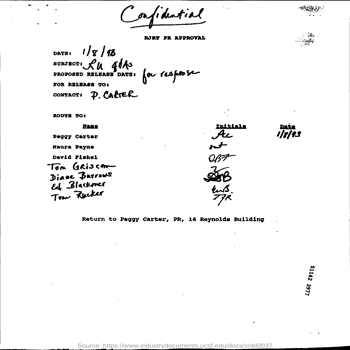

{'DocVQA': 'unanswerable'}


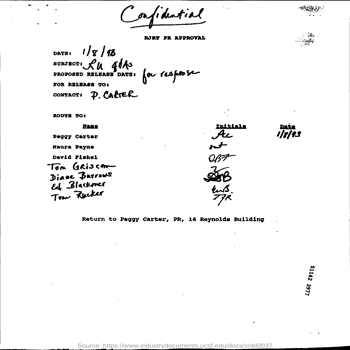

{'DocVQA': '499150498'}


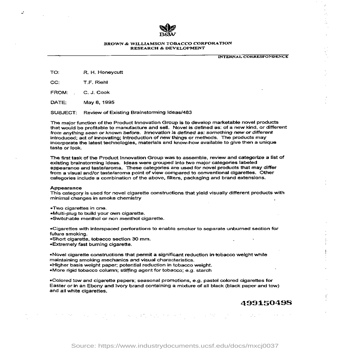

In [ ]:
for idx in range(3):
  print(run_example("DocVQA", 'What do you see in this image?', data['train'][idx]['image']))
  display(data['train'][idx]['image'].resize([350, 350]))

In [ ]:
from torch.utils.data import Dataset

class DocVQADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<DocVQA>" + example['question']
        first_answer = example['answers'][0]
        image = example['image']
        if image.mode != "RGB":
            image = image.convert("RGB")
        return question, first_answer, image


In [ ]:
import os
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import (AdamW, AutoProcessor, get_scheduler)

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(device)
    return inputs, answers

# Create datasets
train_dataset = DocVQADataset(data['train'])
val_dataset = DocVQADataset(data['validation'])

# Create DataLoader
batch_size = 6
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers)

In [ ]:
def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        i = -1
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            i += 1
            inputs, answers = batch

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
                inputs, answers = batch

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Average Validation Loss: {avg_val_loss}")

        # Save model checkpoint
        output_dir = f"./model_checkpoints/epoch_{epoch+1}"
        os.makedirs(output_dir, exist_ok=True)
        model.save_pretrained(output_dir)
        processor.save_pretrained(output_dir)


After training, we push the model to Hugging Face Hub.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
for param in model.vision_tower.parameters():
  param.is_trainable = False

In [ ]:
train_model(train_loader, val_loader, model, processor, epochs=2)

In [ ]:
model.push_to_hub("HuggingFaceM4/Florence-2-FT-DocVQA")
processor.push_to_hub("HuggingFaceM4/Florence-2-FT-DocVQA")